### Data Loading and Preprocessing 

In [1]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import random

2024-11-12 11:13:25.312287: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-12 11:13:25.327828: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-12 11:13:25.332678: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-12 11:13:25.344617: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-12 11:13:25.972994: W tensorflow/compiler/tf2

In [2]:
# Defining the paths for the train and test directories
train_dir = '../FER_2013_dataset/train'
test_dir = '../FER_2013_dataset/test'

# Defining the emotion classes based on the folder names
emotion_classes = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

#A function to show random images
def show_random_images(X_train, y_train, emotion_classes, num_images=20):
    # Set the number of rows and columns for the plot grid
    rows, cols = 4, 5  # 4x5 grid to show 20 images
    plt.figure(figsize=(15, 10))

    # Randomly sample indices for the images to display
    random_indices = random.sample(range(len(X_train)), num_images)
    
    for i, idx in enumerate(random_indices):
        img = X_train[idx]
        label = y_train[idx]

        # Display image in the grid
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img, cmap='gray') 
        plt.title(f"Label: {emotion_classes[label]}")
        plt.axis('off') 
    
    plt.tight_layout()
    plt.show()


In [3]:
# Function to load images from a directory and assign labels
def load_data_from_directory(data_dir, emotion_classes, img_size=(48, 48)):
    each_class_image_numbers=[]
    images = []
    labels = []
    for emotion_label, emotion_name in enumerate(emotion_classes):
        emotion_folder = os.path.join(data_dir, emotion_name)
        totalImages=0
        for img_filename in os.listdir(emotion_folder):
            img_path = os.path.join(emotion_folder, img_filename)
            # Read image in grayscale (FER-2013 images are grayscale)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                # Resize image to the desired size (e.g., 48x48)
                img_resized = cv2.resize(img, img_size)
                # Normalize pixel values to range [0, 1]
                img_normalized = img_resized / 255.0
                # Append image and corresponding label
                images.append(img_normalized)
                labels.append(emotion_label)  # Assign label based on the folder name
                totalImages+=1
        print(f"Total images on {emotion_folder} are :",totalImages)
        each_class_image_numbers.append(totalImages)
    return np.array(images), np.array(labels),each_class_image_numbers

Loading training images from the dataset and assigning each image its corresponding class label.

In [4]:
# Example usage
X_train, y_train,each_class_image_numbers = load_data_from_directory(train_dir, emotion_classes)
print("X_train shape:",X_train.shape)
print("y_train shape:",y_train.shape)

Total images on ../FER_2013_dataset/train/angry are : 3995
Total images on ../FER_2013_dataset/train/disgust are : 436
Total images on ../FER_2013_dataset/train/fear are : 4097
Total images on ../FER_2013_dataset/train/happy are : 7215
Total images on ../FER_2013_dataset/train/sad are : 4830
Total images on ../FER_2013_dataset/train/surprise are : 3171
Total images on ../FER_2013_dataset/train/neutral are : 4965
X_train shape: (28709, 48, 48)
y_train shape: (28709,)


In [ ]:
each_class_image_numbers
[3995, 436, 4097, 7215, 4830, 3171, 4965]
[958,111,1024,1774,1247,831,1233]

[3995, 436, 4097, 7215, 4830, 3171, 4965]

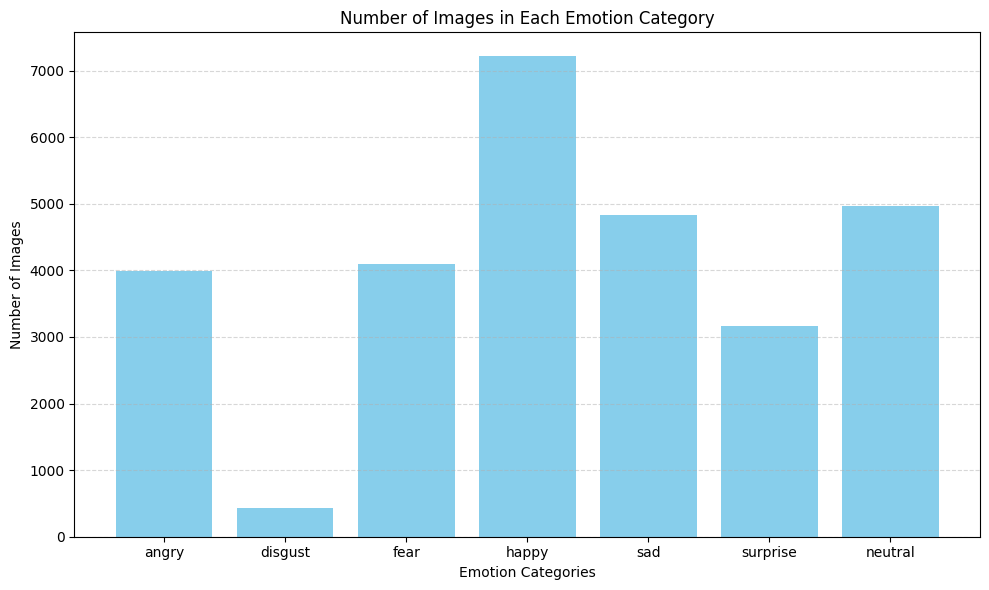

In [6]:
# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.bar(emotion_classes, each_class_image_numbers, color='skyblue')

# Adding title and labels
plt.title('Number of Images in Each Emotion Category')
plt.xlabel('Emotion Categories')
plt.ylabel('Number of Images')

# Show grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()


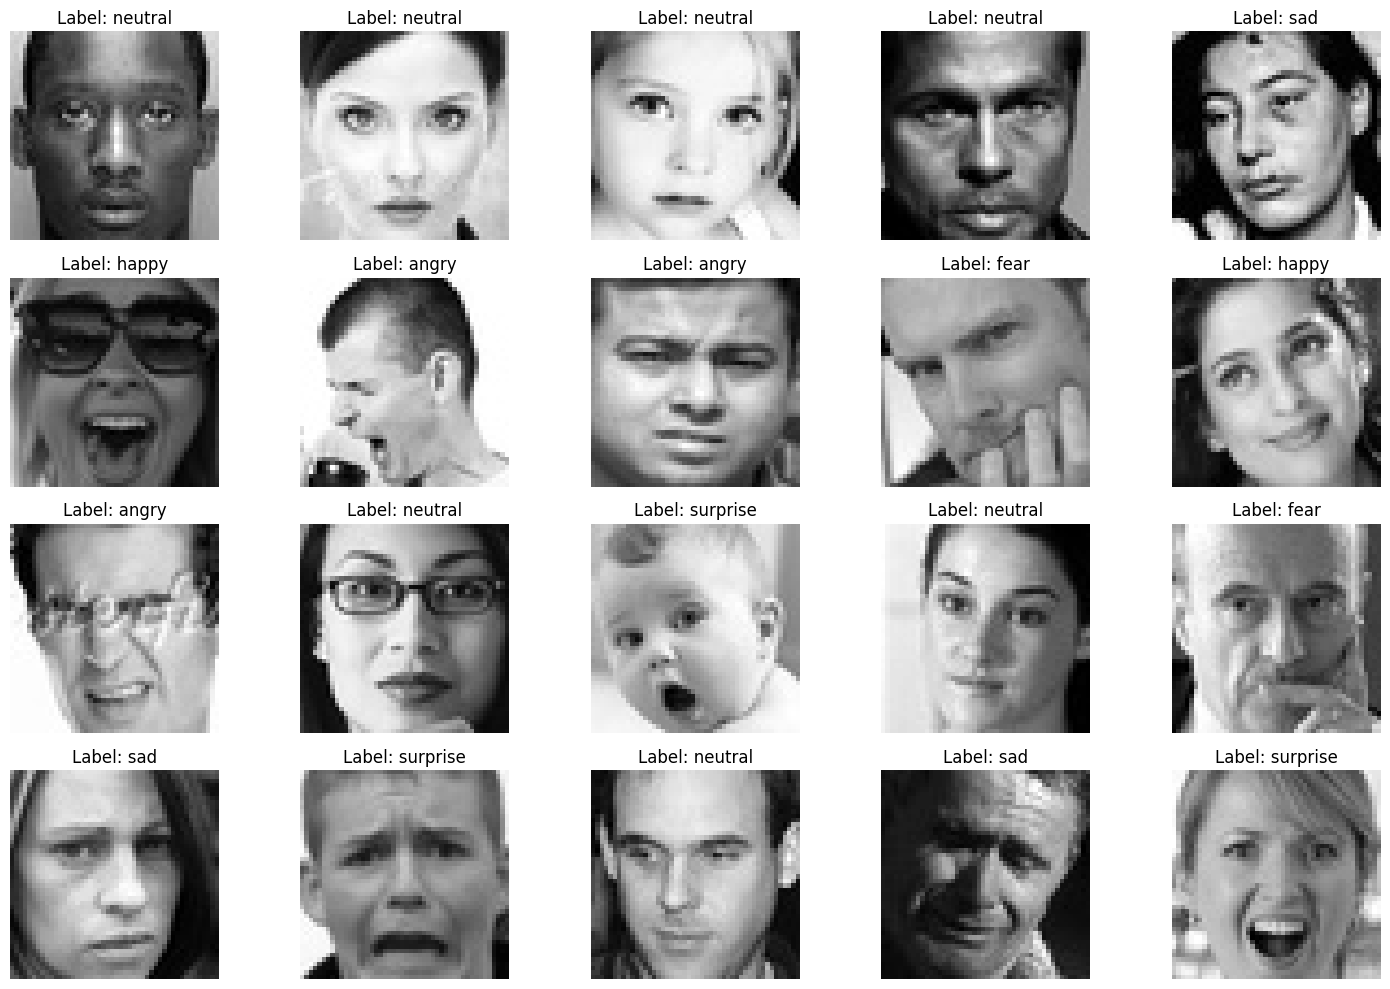

In [7]:
# Showing random images from training data
show_random_images(X_train, y_train, emotion_classes)

Loading testing images from the dataset and assigning each image its corresponding class label.

In [ ]:
# Example usage
X_test, y_test,each_class_image_numbers = load_data_from_directory(test_dir, emotion_classes)
print("X_test shape:",X_test.shape)
print("y_test shape:",y_test.shape)


Total images on ../FER_2013_dataset/test/angry are : 958
Total images on ../FER_2013_dataset/test/disgust are : 111
Total images on ../FER_2013_dataset/test/fear are : 1024
Total images on ../FER_2013_dataset/test/happy are : 1774
Total images on ../FER_2013_dataset/test/sad are : 1247
Total images on ../FER_2013_dataset/test/surprise are : 831
Total images on ../FER_2013_dataset/test/neutral are : 1233
X_test shape: (7178, 48, 48)
y_test shape: (7178,)


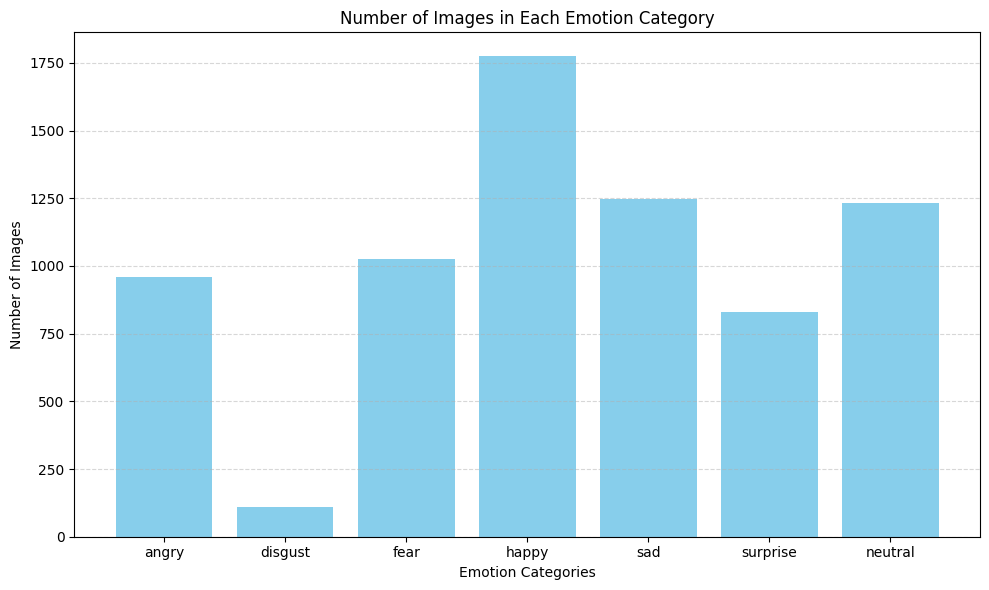

In [16]:
# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.bar(emotion_classes, each_class_image_numbers, color='skyblue')

# Adding title and labels
plt.title('Number of Images in Each Emotion Category')
plt.xlabel('Emotion Categories')
plt.ylabel('Number of Images')

# Show grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

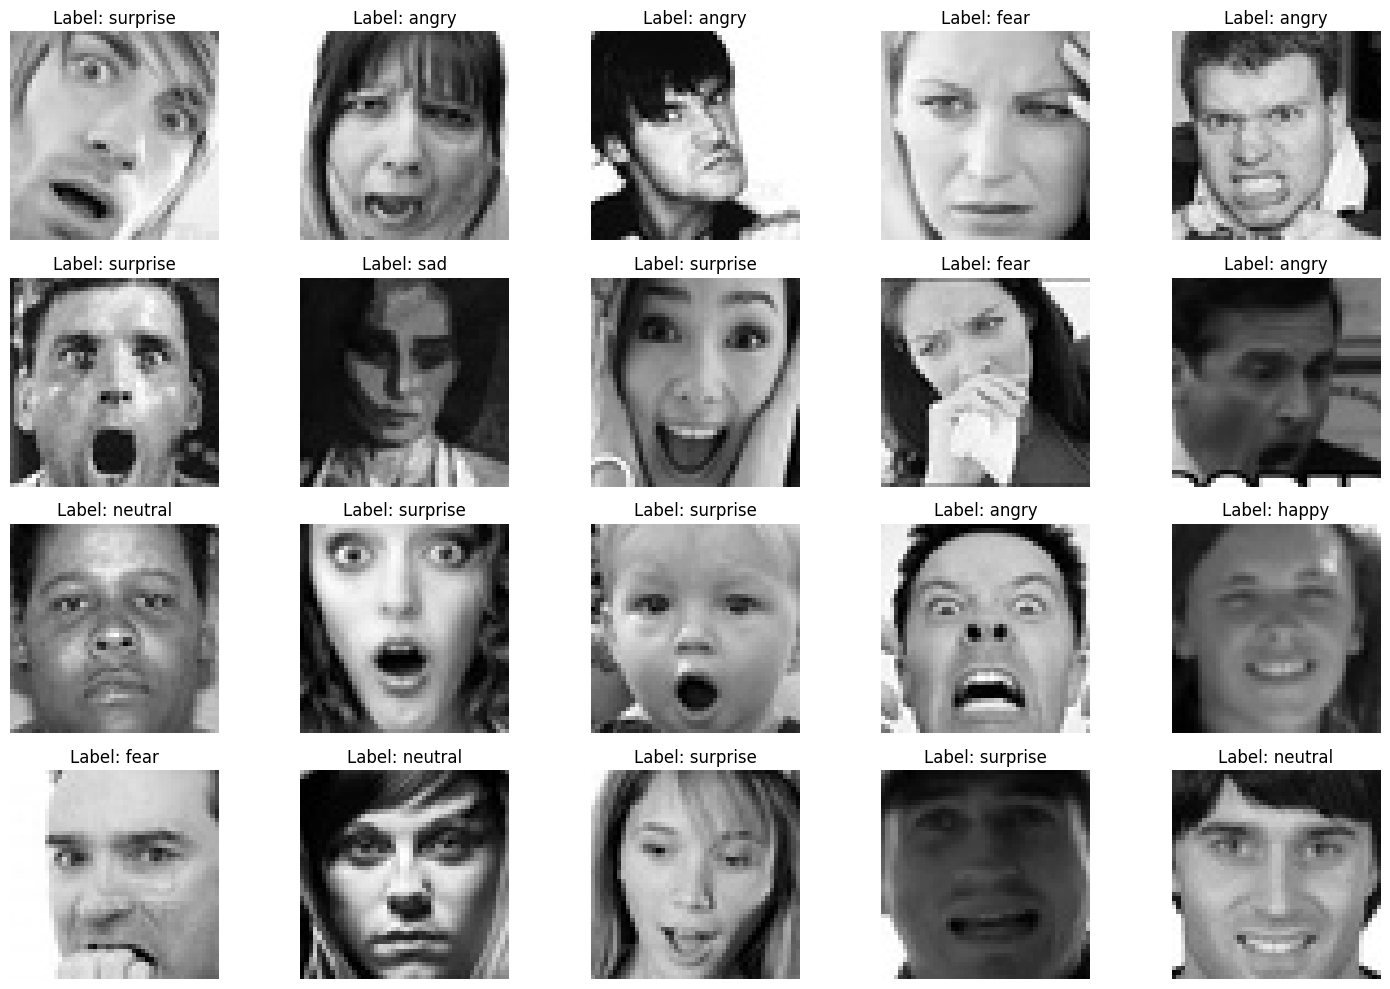

In [17]:
# Showing random images from testing data
show_random_images(X_test, y_test, emotion_classes)

Randomizing the training dataset.

In [18]:
import random

# Zip the lists together and convert to a list of tuples
combined = list(zip(X_train, y_train))

# Shuffle the combined list
random.shuffle(combined)

# Unzip back into separate lists
X_train, y_train = zip(*combined)

# Convert back to lists if needed
X_train_shuffled = np.array(list(X_train))
y_train_shuffled = np.array(list(y_train))

**Flattening the training and test data to feed into the model.**

In [19]:
# Flattening the training data
X_train_flat = X_train_shuffled.reshape(X_train_shuffled.shape[0], -1)

#Flattening the testing data
X_test_flat = X_test.reshape(X_test.shape[0], -1)

#Printing the shape of all the lists
print("Shape of X_train_shuffled :",X_train_shuffled.shape)
print("Shape of X_train_flat :",X_train_flat.shape)
print("Shape of y_train_shuffled :",y_train_shuffled.shape)
print("Shape of X_test :",X_test.shape)
print("Shape of X_test_flat :",X_test_flat.shape)
print("Shape of y_test :",y_test.shape)

Shape of X_train_shuffled : (28709, 48, 48)
Shape of X_train_flat : (28709, 2304)
Shape of y_train_shuffled : (28709,)
Shape of X_test : (7178, 48, 48)
Shape of X_test_flat : (7178, 2304)
Shape of y_test : (7178,)


In [ ]:
#Reinitializing all the variables to ensure consistency in code.
X_train=X_train_flat
y_train=y_train_shuffled
X_test=X_test_flat
y_test=y_test

#---------------------------
# Create and train the model


**Applying PCA to the training and test data.**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the flattened training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

# Check the new shape after PCA
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)

# Apply PCA
pca = PCA(n_components=50)  # Keep 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Check the new shape after PCA
print("Shape of X_train_pca:", X_train_pca.shape)
print("Shape of X_test_pca:", X_test_pca.shape)



Shape of X_train_scaled: (28709, 2304)
Shape of X_test_scaled: (7178, 2304)
Shape of X_train_pca: (28709, 50)
Shape of X_test_pca: (7178, 50)


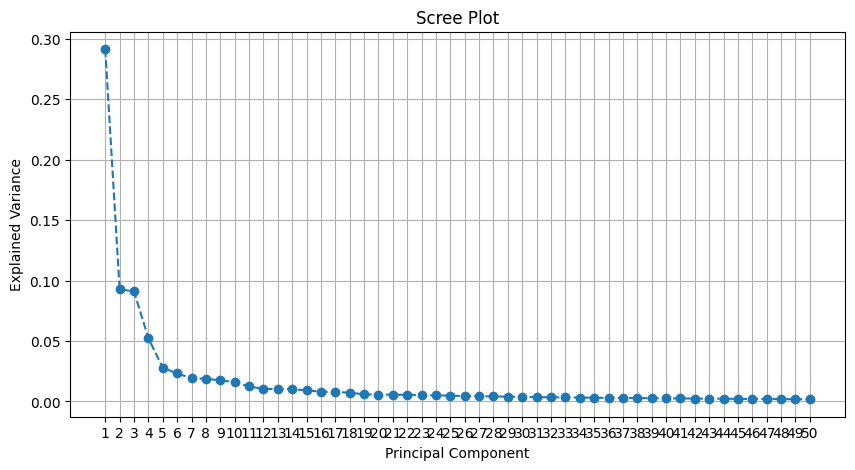

In [30]:
import matplotlib.pyplot as plt

# Assuming pca is your PCA object and you have fit it to the data
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()
